# Q1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import *
from sklearn import metrics

In [2]:
training = pd.read_csv("TSS_data.csv", nrows = 11100)
testing = pd.read_csv("test.csv")
training.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,23.16,23.2700,23.12,23.20,873203,TSS
1,2013-02-11,23.25,23.2500,22.92,23.01,988780,TSS
2,2013-02-12,22.97,23.1299,22.96,23.00,991264,TSS
3,2013-02-13,23.03,23.0900,22.96,23.01,699202,TSS
4,2013-02-14,22.95,23.0700,22.86,23.03,1514119,TSS


In [3]:
testing.head()

,date,open,high,low,close,volume,Name
0,2017-08-04,64.12,64.43,63.820,64.11,801354,TSS
1,2017-08-07,64.01,64.25,63.840,64.18,784883,TSS
2,2017-08-08,64.10,64.34,63.830,64.03,671695,TSS
3,2017-08-09,64.01,64.35,63.795,64.25,940656,TSS
4,2017-08-10,64.03,64.27,63.310,63.43,1284018,TSS


In [4]:
training.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [5]:
testing.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [6]:
training.shape

(1259, 7)

In [7]:
testing.shape

(129, 7)

In [8]:
training = training[training['high']>0]
training.shape

(1259, 7)

In [9]:
testing.drop("Name",axis="columns",inplace=True)

In [10]:
training.drop("Name",axis="columns",inplace=True)

In [11]:
testing

,date,open,high,low,close,volume
0,2017-08-04,64.12,64.43,63.820,64.11,801354
1,2017-08-07,64.01,64.25,63.840,64.18,784883
2,2017-08-08,64.10,64.34,63.830,64.03,671695
3,2017-08-09,64.01,64.35,63.795,64.25,940656
4,2017-08-10,64.03,64.27,63.310,63.43,1284018
...,...,...,...,...,...,...
124,2018-02-01,88.28,89.05,88.165,88.42,1302163
125,2018-02-02,87.86,89.05,86.700,86.83,2023772
126,2018-02-05,86.51,87.41,84.210,84.24,2164610
127,2018-02-06,83.49,85.43,82.150,85.12,2141321


In [12]:
training.head()

,date,open,high,low,close,volume
0,2013-02-08,23.16,23.2700,23.12,23.20,873203
1,2013-02-11,23.25,23.2500,22.92,23.01,988780
2,2013-02-12,22.97,23.1299,22.96,23.00,991264
3,2013-02-13,23.03,23.0900,22.96,23.01,699202
4,2013-02-14,22.95,23.0700,22.86,23.03,1514119


<AxesSubplot:ylabel='high'>

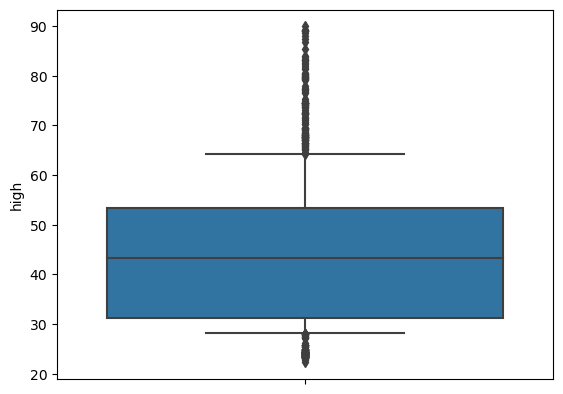

In [13]:
sns.boxplot(y=training['high'],whis=[10,90])

<AxesSubplot:ylabel='high'>

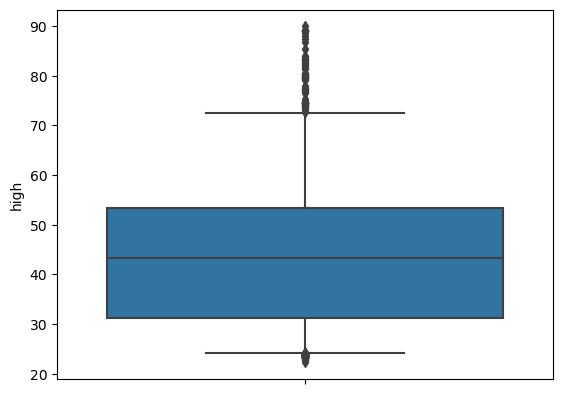

In [14]:
sns.boxplot(y=training['high'],whis=[5,95])

In [15]:
def outs(data,column):
    a = 4
    for x in column:
        iqr = data[x].quantile(0.75) - data[x].quantile(0.25)
        upper_boundary = data[x].quantile(0.75) + (a*iqr)
        lower_boundary = data[x].quantile(0.25) - (a*iqr)
        data = data[(data[x] < upper_boundary) & (data[x] > lower_boundary)]
    return data

In [16]:
training = outs(training,['high'])

In [17]:
training

,date,open,high,low,close,volume
0,2013-02-08,23.16,23.2700,23.120,23.20,873203
1,2013-02-11,23.25,23.2500,22.920,23.01,988780
2,2013-02-12,22.97,23.1299,22.960,23.00,991264
3,2013-02-13,23.03,23.0900,22.960,23.01,699202
4,2013-02-14,22.95,23.0700,22.860,23.03,1514119
...,...,...,...,...,...,...
1254,2018-02-01,88.28,89.0500,88.165,88.42,1302163
1255,2018-02-02,87.86,89.0500,86.700,86.83,2023772
1256,2018-02-05,86.51,87.4100,84.210,84.24,2164610
1257,2018-02-06,83.49,85.4300,82.150,85.12,2141321


In [18]:
import pandas as pd
training['date'] = pd.to_datetime(training.date,format='%Y-%m-%d')
testing['date'] = pd.to_datetime(testing.date,format='%Y-%m-%d')


In [19]:
from sklearn.preprocessing import StandardScaler
ts = StandardScaler()
for i in training.columns:
    a = np.array(training[i]).reshape(-1,1)
    ts.fit(a)
    training[i] = ts.transform(a).reshape(1,-1)[0]

In [20]:
training.head()

,date,open,high,low,close,volume
0,-1.731402,-1.408546,-1.413627,-1.398753,-1.407254,-0.577172
1,-1.725708,-1.402367,-1.414988,-1.412597,-1.420286,-0.416001
2,-1.723810,-1.421591,-1.423160,-1.409828,-1.420972,-0.412537
3,-1.721912,-1.417472,-1.425875,-1.409828,-1.420286,-0.819814
4,-1.720014,-1.422964,-1.427236,-1.416750,-1.418915,0.316578


In [21]:
x=training.drop("close",axis="columns")
y=training['close']

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((881, 5), (378, 5), (881,), (378,))

In [23]:
x


,date,open,high,low,volume
0,-1.731402,-1.408546,-1.413627,-1.398753,-0.577172
1,-1.725708,-1.402367,-1.414988,-1.412597,-0.416001
2,-1.723810,-1.421591,-1.423160,-1.409828,-0.412537
3,-1.721912,-1.417472,-1.425875,-1.409828,-0.819814
4,-1.720014,-1.422964,-1.427236,-1.416750,0.316578
...,...,...,...,...,...
1254,1.721005,3.062458,3.062452,3.103607,0.021008
1255,1.722903,3.033621,3.062452,3.002201,1.027284
1256,1.728597,2.940933,2.950856,2.829845,1.223681
1257,1.730495,2.733586,2.816125,2.687254,1.191204


In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [25]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [26]:
ml=Sequential()
ml.add(Dense(64,activation='sigmoid',input_shape=(5,)))      # input
ml.add(Dense(16,activation='sigmoid'))         # hidden
ml.add(Dense(6,activation='sigmoid'))
ml.add(Dense(1))             # output

In [27]:
opt=SGD(learning_rate=0.0001)
ml.compile(optimizer=opt,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [28]:
ml.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2958 - mae: 1.2958 - mse: 2.2287 - mape: 307.8479
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2911 - mae: 1.2911 - mse: 2.2148 - mape: 306.3177
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2864 - mae: 1.2864 - mse: 2.2013 - mape: 304.6987
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2816 - mae: 1.2816 - mse: 2.1879 - mape: 303.1363
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2769 - mae: 1.2769 - mse: 2.1746 - mape: 301.6378
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2723 - mae: 1.2723 - mse: 2.1612 - mape: 300.0296
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2677 - mae: 1.2677 - mse: 2.1481 - mape: 298.5533
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.2631 - mae: 1.2631 - mse: 2.1354 - mape: 2

In [29]:
ml.evaluate(x_test,y_test)

12/12 [==============================] - 0s 911us/step - loss: 0.8222 - mae: 0.8222 - mse: 1.0028 - mape: 108.9109


[0.822212815284729, 0.822212815284729, 1.0027958154678345, 108.91088104248047]

In [30]:
ml.predict(x_test)

array([[0.03840297],
       [0.05565381],
       [0.03267652],
       [0.04278123],
       [0.04510555],
       [0.03350711],
       [0.04394186],
       [0.06074327],
       [0.04876125],
       [0.04288191],
       [0.03254658],
       [0.04256439],
       [0.03964961],
       [0.04717764],
       [0.04490739],
       [0.04573429],
       [0.04333767],
       [0.0535081 ],
       [0.03935662],
       [0.05107415],
       [0.05032262],
       [0.0457041 ],
       [0.04882061],
       [0.05183175],
       [0.06203735],
       [0.04778457],
       [0.03480843],
       [0.0317902 ],
       [0.04550582],
       [0.0308165 ],
       [0.04288578],
       [0.0538857 ],
       [0.04124814],
       [0.04122365],
       [0.05035609],
       [0.05356067],
       [0.05019134],
       [0.05162984],
       [0.04511428],
       [0.03067753],
       [0.0436734 ],
       [0.03930104],
       [0.04012623],
       [0.03454834],
       [0.05676368],
       [0.03216702],
       [0.04360414],
       [0.042

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
predic = ml.predict(x_test)

In [33]:
print(mean_squared_error(y_test,predic))
print(mean_absolute_percentage_error(y_test,predic))
print(mean_absolute_error(y_test,predic))

1.0027958362466858
1.0891088057793705
0.8222128028890437


In [34]:
m1=[mean_absolute_percentage_error(y_test,predic),mean_absolute_error(y_test,predic),mean_squared_error(y_test,predic)]

primary model

In [35]:
ml1=Sequential()                         # neurons change
ml1.add(Dense(64,activation='sigmoid',input_shape=(5,)))      # input
ml1.add(Dense(32,activation='sigmoid'))         # hidden
ml1.add(Dense(16,activation='sigmoid'))
ml1.add(Dense(1))             # output

In [36]:
opt1=SGD(learning_rate=0.0001)
ml1.compile(optimizer=opt1,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [37]:
ml1.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9006 - mae: 0.9006 - mse: 1.1884 - mape: 154.6440
Epoch 2/1000
28/28 [==============================] - 0s 999us/step - loss: 0.8985 - mae: 0.8985 - mse: 1.1827 - mape: 153.4550
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8964 - mae: 0.8964 - mse: 1.1771 - mape: 152.2289
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8944 - mae: 0.8944 - mse: 1.1718 - mape: 151.1347
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8924 - mae: 0.8924 - mse: 1.1664 - mape: 149.9962
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8905 - mae: 0.8905 - mse: 1.1614 - mape: 148.9635
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8887 - mae: 0.8887 - mse: 1.1565 - mape: 147.7645
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8869 - mae: 0.8869 - mse: 1.1515 - mape:

In [38]:
ml1.evaluate(x_test,y_test)
pred2 = ml1.predict(x_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.8087 - mae: 0.8087 - mse: 0.9724 - mape: 98.4571


In [39]:
print(mean_squared_error(y_test,pred2))
print(mean_absolute_percentage_error(y_test,pred2))
print(mean_absolute_error(y_test,pred2))

0.9724498831568382
0.9845705969560047
0.8087289024813409


In [40]:
m2=[mean_absolute_percentage_error(y_test,pred2),mean_absolute_error(y_test,pred2),mean_squared_error(y_test,pred2)]

activation

In [41]:
ml2=Sequential()           # activation change
ml2.add(Dense(64,activation='relu',input_shape=(5,)))      # input
ml2.add(Dense(16,activation='relu'))         # hidden
ml2.add(Dense(8,activation='relu'))
ml2.add(Dense(1))             # output

In [42]:
opt2=SGD(learning_rate=0.0002)
ml2.compile(optimizer=opt2,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [43]:
ml2.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6266 - mae: 0.6266 - mse: 0.6950 - mape: 80.9805
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6161 - mae: 0.6161 - mse: 0.6827 - mape: 79.9748
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6056 - mae: 0.6056 - mse: 0.6712 - mape: 78.9884
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5951 - mae: 0.5951 - mse: 0.6602 - mape: 77.9714
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5847 - mae: 0.5847 - mse: 0.6499 - mape: 76.9815
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5742 - mae: 0.5742 - mse: 0.6402 - mape: 76.0471
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5637 - mae: 0.5637 - mse: 0.6311 - mape: 75.0577
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5534 - mae: 0.5534 - mse: 0.6228 - mape: 74.0718


In [44]:
ml2.evaluate(x_test,y_test)
pred3 = ml2.predict(x_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.0212 - mse: 0.0013 - mape: 29.8272


In [45]:
print(mean_squared_error(y_test,pred3))
print(mean_absolute_percentage_error(y_test,pred3))
print(mean_absolute_error(y_test,pred3))

0.0012590066219378456
0.29827153148654356
0.021189158526894614


In [46]:
m3=[mean_absolute_percentage_error(y_test,pred3),mean_absolute_error(y_test,pred3),mean_squared_error(y_test,pred3)]

optimizer adam

In [47]:
ml3=Sequential()
ml3.add(Dense(64,activation='relu',input_shape=(5,)))
ml3.add(Dense(32,activation='relu'))
ml3.add(Dense(24,activation='relu'))
ml3.add(Dense(18,activation='relu'))
ml3.add(Dense(16,activation='relu'))
ml3.add(Dense(8,activation='relu'))
ml3.add(Dense(1))

In [48]:
opt3=Adam(learning_rate=0.0001)
ml3.compile(optimizer=opt3,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [49]:
ml3.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8205 - mae: 0.8205 - mse: 0.9474 - mape: 97.5301
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7912 - mae: 0.7912 - mse: 0.8745 - mape: 94.6471
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7413 - mae: 0.7413 - mse: 0.7718 - mape: 89.4188
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6768 - mae: 0.6768 - mse: 0.6613 - mape: 84.4769
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6007 - mae: 0.6007 - mse: 0.5535 - mape: 80.8234
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5293 - mae: 0.5293 - mse: 0.4709 - mape: 78.7270
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4863 - mae: 0.4863 - mse: 0.4309 - mape: 74.7230
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4579 - mae: 0.4579 - mse: 0.4136 - mape: 66.5270


In [50]:
ml3.evaluate(x_test,y_test)
pred4 = ml3.predict(x_test)
pred4

12/12 [==============================] - 0s 1ms/step - loss: 0.0142 - mae: 0.0142 - mse: 4.8940e-04 - mape: 19.0484


array([[-1.3670779e+00],
       [ 6.9961333e-01],
       [-1.3005775e+00],
       [ 1.1267519e-01],
       [-3.1143808e-01],
       [-1.3079522e+00],
       [ 2.1898854e-01],
       [ 2.4275649e+00],
       [ 7.7040553e-02],
       [-7.4306452e-01],
       [-1.3435476e+00],
       [ 4.5191479e-01],
       [-8.0783641e-01],
       [-4.0719211e-01],
       [ 2.7728724e-01],
       [ 3.2295179e-01],
       [-8.6872023e-01],
       [ 6.4956093e-01],
       [-8.3369243e-01],
       [ 3.0953074e-01],
       [ 2.5887883e-01],
       [-3.9651036e-01],
       [ 2.3379457e-01],
       [ 5.7297504e-01],
       [ 1.6012795e+00],
       [-8.9524269e-02],
       [-9.5813477e-01],
       [-1.3769166e+00],
       [-3.9545172e-01],
       [-7.9394048e-01],
       [-7.8640020e-01],
       [ 3.2968795e-01],
       [ 5.7537746e-01],
       [-6.5025210e-02],
       [ 6.8330741e-01],
       [ 5.8289683e-01],
       [ 3.9991665e-01],
       [ 6.5103030e-01],
       [ 5.0529969e-01],
       [ 2.1120119e-01],


In [51]:
print(mean_squared_error(y_test,pred4))
print(mean_absolute_percentage_error(y_test,pred4))
print(mean_absolute_error(y_test,pred4))

0.0004893968381499041
0.19048381075558887
0.01420189149524924


In [52]:
m4=[mean_absolute_percentage_error(y_test,pred4),mean_absolute_error(y_test,pred4),mean_squared_error(y_test,pred4)]

tanh

In [53]:
mln=Sequential()
mln.add(Dense(64,activation='relu',input_shape=(5,)))
mln.add(Dense(32,activation='relu'))
mln.add(Dense(24,activation='relu'))
mln.add(Dense(18,activation='relu'))
mln.add(Dense(16,activation='relu'))
mln.add(Dense(8,activation='relu'))
mln.add(Dense(1))

In [54]:
optn=Adam(learning_rate=0.0001)
mln.compile(optimizer=optn,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [55]:
mln.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8364 - mae: 0.8364 - mse: 0.9895 - mape: 99.6715
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8192 - mae: 0.8192 - mse: 0.9565 - mape: 97.5243
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7973 - mae: 0.7973 - mse: 0.9132 - mape: 94.8436
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7661 - mae: 0.7661 - mse: 0.8536 - mape: 91.1112
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7234 - mae: 0.7234 - mse: 0.7754 - mape: 85.8146
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6712 - mae: 0.6712 - mse: 0.6868 - mape: 79.3889
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6062 - mae: 0.6062 - mse: 0.5848 - mape: 71.6142
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5232 - mae: 0.5232 - mse: 0.4670 - mape: 61.9948


In [56]:
mln.evaluate(x_test,y_test)
predn = mln.predict(x_test)
predn

12/12 [==============================] - 0s 1ms/step - loss: 0.0147 - mae: 0.0147 - mse: 4.8816e-04 - mape: 22.3786


array([[-1.3659648 ],
       [ 0.709788  ],
       [-1.2954872 ],
       [ 0.11786163],
       [-0.3337229 ],
       [-1.3027508 ],
       [ 0.23793912],
       [ 2.4332588 ],
       [ 0.08477429],
       [-0.7355498 ],
       [-1.3404243 ],
       [ 0.44384772],
       [-0.8186609 ],
       [-0.40520993],
       [ 0.2638287 ],
       [ 0.3244362 ],
       [-0.8600622 ],
       [ 0.65318537],
       [-0.83108103],
       [ 0.3239765 ],
       [ 0.26001295],
       [-0.39745367],
       [ 0.23814987],
       [ 0.5862261 ],
       [ 1.6197331 ],
       [-0.08956745],
       [-0.95634824],
       [-1.4125396 ],
       [-0.3897676 ],
       [-0.80525106],
       [-0.7841965 ],
       [ 0.32252643],
       [ 0.5905605 ],
       [-0.07902694],
       [ 0.6939322 ],
       [ 0.5986712 ],
       [ 0.40947643],
       [ 0.66005284],
       [ 0.5160678 ],
       [ 0.1849173 ],
       [ 0.05184764],
       [-0.9152454 ],
       [-0.76007074],
       [-0.9073102 ],
       [ 0.6411228 ],
       [-1

In [57]:
print(mean_squared_error(y_test,predn))
print(mean_absolute_percentage_error(y_test,predn))
print(mean_absolute_error(y_test,predn))

0.0004881561023981113
0.2237863460835974
0.014723696777349261


In [58]:
mn=[mean_absolute_percentage_error(y_test,predn),mean_absolute_error(y_test,predn),mean_squared_error(y_test,predn)]

optimizer sgd

In [59]:
ml6=Sequential()
ml6.add(Dense(64,activation='relu',input_shape=(5,)))
ml6.add(Dense(32,activation='relu'))
ml6.add(Dense(24,activation='relu'))
ml6.add(Dense(18,activation='relu'))
ml6.add(Dense(16,activation='relu'))
ml6.add(Dense(8,activation='relu'))
ml6.add(Dense(1))

In [60]:
opt6=SGD(learning_rate=0.0001)
ml6.compile(optimizer=opt6,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [61]:
ml6.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8217 - mae: 0.8217 - mse: 0.9427 - mape: 97.6876
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8203 - mae: 0.8203 - mse: 0.9399 - mape: 97.4663
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8189 - mae: 0.8189 - mse: 0.9371 - mape: 97.2616
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8174 - mae: 0.8174 - mse: 0.9342 - mape: 97.0604
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8160 - mae: 0.8160 - mse: 0.9314 - mape: 96.8532
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8147 - mae: 0.8147 - mse: 0.9287 - mape: 96.6783
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8133 - mae: 0.8133 - mse: 0.9259 - mape: 96.4924
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8120 - mae: 0.8120 - mse: 0.9233 - mape: 96.3132


In [62]:
ml6.evaluate(x_test,y_test)
pre = ml6.predict(x_test)
pre

12/12 [==============================] - 0s 1ms/step - loss: 0.0548 - mae: 0.0548 - mse: 0.0090 - mape: 27.7758


array([[-1.0634574 ],
       [ 0.71994734],
       [-1.1019737 ],
       [ 0.11915088],
       [-0.3736675 ],
       [-1.0913314 ],
       [ 0.2588216 ],
       [ 2.3764038 ],
       [ 0.05054826],
       [-0.7345208 ],
       [-1.1024349 ],
       [ 0.4797125 ],
       [-0.8529156 ],
       [-0.4210793 ],
       [ 0.26615942],
       [ 0.312459  ],
       [-0.8287579 ],
       [ 0.6339525 ],
       [-0.84165776],
       [ 0.29113024],
       [ 0.24856758],
       [-0.41692692],
       [ 0.18732071],
       [ 0.5638524 ],
       [ 1.6061941 ],
       [-0.13005218],
       [-0.99138385],
       [-1.0968721 ],
       [-0.40549242],
       [-0.8563843 ],
       [-0.799285  ],
       [ 0.35464555],
       [ 0.48878622],
       [-0.07530761],
       [ 0.7138616 ],
       [ 0.5813527 ],
       [ 0.36592484],
       [ 0.6770402 ],
       [ 0.54143274],
       [ 0.06374741],
       [ 0.08542502],
       [-0.9350444 ],
       [-0.7639314 ],
       [-0.96878177],
       [ 0.64058757],
       [-1

In [63]:
print(mean_squared_error(y_test,pre))
print(mean_absolute_percentage_error(y_test,pre))
print(mean_absolute_error(y_test,pre))

0.009020218929206042
0.2777576824826069
0.05483588352366465


In [64]:
m5=[mean_absolute_percentage_error(y_test,pre),mean_absolute_error(y_test,pre),mean_squared_error(y_test,pre)]

optimizer rmsprop

In [65]:
ml7=Sequential()
ml7.add(Dense(64,activation='relu',input_shape=(5,)))
ml7.add(Dense(32,activation='relu'))
ml7.add(Dense(24,activation='relu'))
ml7.add(Dense(18,activation='relu'))
ml7.add(Dense(16,activation='relu'))
ml7.add(Dense(8,activation='relu'))
ml7.add(Dense(1))

In [66]:
opt7=RMSprop(learning_rate=0.001)
ml7.compile(optimizer=opt7,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [67]:
ml7.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 1s 1ms/step - loss: 0.4821 - mae: 0.4821 - mse: 0.4323 - mape: 61.4659
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.1323 - mae: 0.1323 - mse: 0.0507 - mape: 24.4805
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.0508 - mae: 0.0508 - mse: 0.0043 - mape: 10.8745
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.0445 - mae: 0.0445 - mse: 0.0033 - mape: 9.6608
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.0398 - mae: 0.0398 - mse: 0.0027 - mape: 7.8640
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.0403 - mae: 0.0403 - mse: 0.0029 - mape: 8.2191
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.0399 - mae: 0.0399 - mse: 0.0027 - mape: 7.9907
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.0382 - mae: 0.0382 - mse: 0.0025 - mape: 8.3617
Epoch

In [68]:
ml7.evaluate(x_test,y_test)
pred7 = ml7.predict(x_test)
pred7

12/12 [==============================] - 0s 1ms/step - loss: 0.0213 - mae: 0.0213 - mse: 7.7579e-04 - mape: 9.6515


array([[-1.389935  ],
       [ 0.72702473],
       [-1.3148555 ],
       [ 0.12865283],
       [-0.35213625],
       [-1.3204194 ],
       [ 0.24960716],
       [ 2.4527884 ],
       [ 0.07570272],
       [-0.7512942 ],
       [-1.3593901 ],
       [ 0.4774212 ],
       [-0.8327119 ],
       [-0.4121419 ],
       [ 0.30114448],
       [ 0.3326763 ],
       [-0.87372494],
       [ 0.6744788 ],
       [-0.84026563],
       [ 0.32070324],
       [ 0.2799665 ],
       [-0.40705833],
       [ 0.23256947],
       [ 0.5981562 ],
       [ 1.642533  ],
       [-0.12188093],
       [-0.9713109 ],
       [-1.4311856 ],
       [-0.39966002],
       [-0.8241508 ],
       [-0.80093485],
       [ 0.33120495],
       [ 0.6255138 ],
       [-0.02245398],
       [ 0.709692  ],
       [ 0.6153076 ],
       [ 0.410633  ],
       [ 0.6823755 ],
       [ 0.5432252 ],
       [ 0.28575894],
       [ 0.0687107 ],
       [-0.93446124],
       [-0.7708275 ],
       [-0.9199078 ],
       [ 0.6454361 ],
       [-1

In [69]:
print(mean_squared_error(y_test,pred7))
print(mean_absolute_percentage_error(y_test,pred7))
print(mean_absolute_error(y_test,pred7))

0.0007757907528098633
0.09651502063445624
0.021339881775371824


In [70]:
m6=[mean_absolute_percentage_error(y_test,pred7),mean_absolute_error(y_test,pred7),mean_squared_error(y_test,pred7)]

neurons and layers

In [71]:
ml4=Sequential()
ml4.add(Dense(64,activation='relu',input_shape=(5,)))
ml4.add(Dense(32,activation='relu'))
ml4.add(Dense(24,activation='relu'))
ml4.add(Dense(18,activation='relu'))
ml4.add(Dense(16,activation='relu'))
ml4.add(Dense(8,activation='relu'))
ml4.add(Dense(1))

In [72]:
opt4=SGD(learning_rate=0.0001)
ml4.compile(optimizer=opt4,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape'])

In [73]:
ml4.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8065 - mae: 0.8065 - mse: 0.9146 - mape: 95.9514
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8055 - mae: 0.8055 - mse: 0.9125 - mape: 95.8111
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8044 - mae: 0.8044 - mse: 0.9103 - mape: 95.6695
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8034 - mae: 0.8034 - mse: 0.9082 - mape: 95.5536
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8024 - mae: 0.8024 - mse: 0.9061 - mape: 95.4276
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8014 - mae: 0.8014 - mse: 0.9040 - mape: 95.2917
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8003 - mae: 0.8003 - mse: 0.9019 - mape: 95.1786
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7993 - mae: 0.7993 - mse: 0.8998 - mape: 95.0406


In [74]:
ml4.evaluate(x_test,y_test)
pred5 = ml4.predict(x_test)
pred5

12/12 [==============================] - 0s 1ms/step - loss: 0.0721 - mae: 0.0721 - mse: 0.0197 - mape: 37.7173


array([[-0.94268745],
       [ 0.7154715 ],
       [-0.9362285 ],
       [ 0.12260282],
       [-0.42418775],
       [-0.93264663],
       [ 0.24818593],
       [ 2.3720193 ],
       [ 0.06831557],
       [-0.789185  ],
       [-0.93217075],
       [ 0.43928576],
       [-0.86044264],
       [-0.4070986 ],
       [ 0.25902444],
       [ 0.30916512],
       [-0.824827  ],
       [ 0.65041566],
       [-0.8680748 ],
       [ 0.2916836 ],
       [ 0.2892546 ],
       [-0.45016006],
       [ 0.21047491],
       [ 0.56551754],
       [ 1.5999382 ],
       [-0.11059463],
       [-0.915197  ],
       [-0.9251946 ],
       [-0.45420593],
       [-0.83902353],
       [-0.77489305],
       [ 0.34036446],
       [ 0.5628996 ],
       [-0.11158174],
       [ 0.7026509 ],
       [ 0.5907922 ],
       [ 0.40503395],
       [ 0.67426884],
       [ 0.5442233 ],
       [ 0.24040842],
       [ 0.05996817],
       [-0.89162624],
       [-0.8513298 ],
       [-0.89329   ],
       [ 0.62623453],
       [-0

In [75]:
print(mean_squared_error(y_test,pred5))
print(mean_absolute_percentage_error(y_test,pred5))
print(mean_absolute_error(y_test,pred5))

0.01970320880944089
0.37717342935318
0.07210741728632585


In [76]:
m7=[mean_absolute_percentage_error(y_test,pred5),mean_absolute_error(y_test,pred5),mean_squared_error(y_test,pred5)]

early stopping

In [77]:
mls4=Sequential()
mls4.add(Dense(64,activation='sigmoid',input_shape=(5,)))
mls4.add(Dense(32,activation='sigmoid'))
mls4.add(Dense(24,activation='sigmoid'))
mls4.add(Dense(18,activation='sigmoid'))
mls4.add(Dense(16,activation='sigmoid'))
mls4.add(Dense(8,activation='sigmoid'))
mls4.add(Dense(1))

In [78]:
from keras.callbacks import EarlyStopping

In [79]:
mls4.compile(optimizer=opt,loss=['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error'],metrics=['mse','mae','mape'])

In [80]:
monitor=EarlyStopping(monitor="loss",min_delta=0,patience=5,verbose=1,
mode="auto",baseline=None,restore_best_weights=True)

In [81]:
mls4.fit(x_train,y_train,epochs=500,callbacks=[monitor])

Epoch 1/500
28/28 [==============================] - 0s 1ms/step - loss: 1.9109 - mse: 1.9109 - mae: 1.0424 - mape: 261.8629
Epoch 2/500
28/28 [==============================] - 0s 1ms/step - loss: 1.8695 - mse: 1.8695 - mae: 1.0281 - mape: 256.8002
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 1.8299 - mse: 1.8299 - mae: 1.0147 - mape: 251.7658
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 1.7925 - mse: 1.7925 - mae: 1.0032 - mape: 247.1237
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 1.7566 - mse: 1.7566 - mae: 0.9925 - mape: 242.8617
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 1.7222 - mse: 1.7222 - mae: 0.9825 - mape: 238.1068
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 1.6894 - mse: 1.6894 - mae: 0.9738 - mape: 233.8945
Epoch 8/500
28/28 [==============================] - 0s 1ms/step - loss: 1.6582 - mse: 1.6582 - mae: 0.9663 - mape: 229.9666


In [82]:
mls4.evaluate(x_test,y_test)

12/12 [==============================] - 0s 1ms/step - loss: 1.0160 - mse: 1.0160 - mae: 0.8271 - mape: 100.5745


[1.0159567594528198,
 1.0159567594528198,
 0.8271306157112122,
 100.57454681396484]

In [83]:
preds=mls4.predict(x_test)

In [84]:
y_test.isna().sum()

0

In [85]:
print(mean_squared_error(y_test,preds))
print(mean_absolute_percentage_error(y_test,preds))
print(mean_absolute_error(y_test,preds))

1.0159567901990432
1.0057455217271412
0.8271305788043593


In [86]:
m8=[mean_absolute_percentage_error(y_test,preds),mean_absolute_error(y_test,preds),mean_squared_error(y_test,preds)]

dropout

In [87]:
ml24=Sequential()
ml24.add(Dense(64,activation='sigmoid',input_shape=(5,)))
ml24.add(Dense(32,activation='sigmoid'))
ml24.add(Dense(16,activation='sigmoid'))
ml24.add(Dropout(0.3))
ml24.add(Dense(8,activation='sigmoid'))
ml24.add(Dense(1,activation='sigmoid'))
ml24.add(Dropout(0.3))
ml24.add(Dense(12,activation='sigmoid'))
ml24.add(Dense(1))

In [88]:
ml24.compile(optimizer=opt,loss=['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error'],metrics=['mse','mae','mape'])

In [89]:
ml24.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 1.3874 - mse: 1.3874 - mae: 0.9118 - mape: 194.0275
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 1.3641 - mse: 1.3641 - mae: 0.9087 - mape: 189.1905
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 1.3491 - mse: 1.3491 - mae: 0.9034 - mape: 186.8839
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 1.3271 - mse: 1.3271 - mae: 0.8993 - mape: 183.4964
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 1.3175 - mse: 1.3175 - mae: 0.9006 - mape: 183.3632
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 1.2996 - mse: 1.2996 - mae: 0.8932 - mape: 178.3494
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 1.2849 - mse: 1.2849 - mae: 0.8919 - mape: 177.0254
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 1.2700 - mse: 1.2700 - mae: 0.8884 - mape: 173.8368


predictions

In [90]:
ml24.evaluate(x_test,y_test)
preds2=ml24.predict(x_test)

12/12 [==============================] - 0s 1ms/step - loss: 1.0183 - mse: 1.0183 - mae: 0.8260 - mape: 113.9999


In [91]:
print(mean_squared_error(y_test,preds2))
print(mean_absolute_percentage_error(y_test,preds2))
print(mean_absolute_error(y_test,preds2))

1.018302346424647
1.1399987114530914
0.826039601043399


In [92]:
m9=[mean_absolute_percentage_error(y_test,preds2),mean_absolute_error(y_test,preds2),mean_squared_error(y_test,preds2)]

table1

In [93]:
table1=pd.DataFrame({"BaseLine NN sgd":m1,"activation":m3,"adam":m4,"sgd":m5,"rms prop":m6,"neurons and layers":m7,"dropuot": m9,"early stop":m8,"tanh": mn},index=["MAPE",'MAE','MSE'])
table1

,BaseLine NN sgd,activation,adam,sgd,rms prop,neurons and layers,dropuot,early stop,tanh
MAPE,1.089109,0.298272,0.190484,0.277758,0.096515,0.377173,1.139999,1.005746,0.223786
MAE,0.822213,0.021189,0.014202,0.054836,0.021340,0.072107,0.826040,0.827131,0.014724
MSE,1.002796,0.001259,0.000489,0.009020,0.000776,0.019703,1.018302,1.015957,0.000488


In [94]:
f_mape=np.array(table1.loc['MAPE'].tolist())
f_mae=np.array(table1.loc['MAE'].tolist())
f_mse=np.array(table1.loc['MSE'].tolist())

confidence intervals

In [95]:
from scipy.stats import t
def confi(arr):
    m=arr.mean()
    s=arr.std()
    dof=len(arr)-1
    conf=0.95
    t_crit = np.abs(t.ppf((1-conf)/2,dof))
    return [m-s*t_crit/np.sqrt(len(arr)), m+s*t_crit/np.sqrt(len(arr))]

In [96]:
c_mape=confi(f_mape)
c_mae=confi(f_mae)
c_mse=confi(f_mse)

In [97]:
c_mape,c_mae,c_mse

([0.213762697099729, 0.8304241606237324],
 [0.009739606222938402, 0.5844339298040966],
 [-0.023975859900029595, 0.7059293601054337])

In [98]:
table2=pd.DataFrame({"Min":[c_mape[0],c_mae[0],c_mse[0]],"Max":[c_mape[1],c_mae[1],c_mse[1]]},index=["MAPE",'MAE','MSE'])
table2

,Min,Max
MAPE,0.213763,0.830424
MAE,0.009740,0.584434
MSE,-0.023976,0.705929


In [99]:
def ann(Optimizer_trial):    
    ml = Sequential()
    ml.add(Dense(32, input_dim=5, kernel_initializer='normal', activation='relu'))
    ml.add(Dense(28, kernel_initializer='normal', activation='relu'))
    ml.add(Dense(12, kernel_initializer='normal', activation='relu'))
    ml.add(Dense(4, kernel_initializer='normal', activation='relu'))
    ml.add(Dense(1, kernel_initializer='normal'))
    ml.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return ml
 
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 

Parameter_Trials={'batch_size':[100,120,130,140],'epochs':[40,50,60,70,80],'Optimizer_trial':['adam', 'rmsprop','SGD']}
 

RegMl=KerasRegressor(ann, verbose=0)
 

from sklearn.metrics import make_scorer
 

def Accuracy(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy, greater_is_better=True)
 

rand_search=RandomizedSearchCV(RegMl,Parameter_Trials,scoring=custom_Scoring,cv=5)
 

import time
StartTime=time.time()
 

rand_search.fit(x_train,y_train,verbose=1)
 
EndTime=time.time()
print(round((EndTime-StartTime)/60))

rand_search.best_params_

Epoch 1/70


C:\Users\tarun\AppData\Local\Temp\ipykernel_10428\1311079154.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegMl=KerasRegressor(ann, verbose=0)


8/8 [==============================] - 0s 1ms/step - loss: 1.0193
Epoch 2/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0187
Epoch 3/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0187
Epoch 4/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0189
Epoch 5/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0186
Epoch 6/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0187
Epoch 7/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0188
Epoch 8/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0186
Epoch 9/70
8/8 [==============================] - 0s 2ms/step - loss: 1.0186
Epoch 10/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0187
Epoch 11/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0187
Epoch 12/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0186
Epoch 13/70
8/8 [==============================] - 0s 1ms/step - loss: 1.0187
Epoch 

{'epochs': 50, 'batch_size': 130, 'Optimizer_trial': 'rmsprop'}

best parameters are 70 epoches,optimizer adam,batch size is 100

In [100]:
if (rand_search.best_params_['Optimizer_trial']) == 'adam':
    a = Adam
elif (rand_search.best_params_['Optimizer_trial']) == 'rmsprop':
    a = RMSprop
elif (rand_search.best_params_['Optimizer_trial']) == 'SGD':
    a = SGD
print(a)

<class 'keras.optimizer_v2.rmsprop.RMSprop'>


In [101]:
callable(a)

True

In [102]:
mlfinal=Sequential()
mlfinal.add(Dense(64,activation='relu',input_shape=(5,)))
mlfinal.add(Dense(32,activation='relu'))
mlfinal.add(Dense(24,activation='relu'))
mlfinal.add(Dense(18,activation='relu'))
mlfinal.add(Dense(16,activation='relu'))
mlfinal.add(Dense(8,activation='relu'))
mlfinal.add(Dense(1))

In [103]:
optfianl=a(learning_rate=0.001)
mlfinal.compile(optimizer=optfianl,loss=['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],metrics=['mae','mse','mape','Accuracy'])

In [104]:
mlfinal.fit(x_train,y_train,epochs=rand_search.best_params_['epochs'],batch_size=rand_search.best_params_['batch_size'])

Epoch 1/50
7/7 [==============================] - 1s 1ms/step - loss: 0.6556 - mae: 0.6556 - mse: 0.6634 - mape: 84.7315 - Accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4117 - mae: 0.4117 - mse: 0.3044 - mape: 56.8787 - Accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.2935 - mae: 0.2935 - mse: 0.1667 - mape: 40.6258 - Accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1523 - mae: 0.1523 - mse: 0.0445 - mape: 30.7940 - Accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0764 - mae: 0.0764 - mse: 0.0095 - mape: 21.0999 - Accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - mae: 0.0574 - mse: 0.0053 - mape: 15.2939 - Accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0497 - mae: 0.0497 - mse: 0.0040 - mape: 11.4152 - Accuracy: 0.0

In [105]:
mlfinal.evaluate(x_test,y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0448 - mae: 0.0448 - mse: 0.0038 - mape: 37.1034 - Accuracy: 0.0000e+00


[0.044789839535951614,
 0.044789839535951614,
 0.003807948436588049,
 37.10343933105469,
 0.0]

In [106]:
pred_final = mlfinal.predict(x_test)
pred_final

array([[-1.3951857e+00],
       [ 6.8845683e-01],
       [-1.3285788e+00],
       [ 9.9683687e-02],
       [-3.7093130e-01],
       [-1.3163338e+00],
       [ 2.1418324e-01],
       [ 2.2686973e+00],
       [ 6.8359949e-02],
       [-7.6910979e-01],
       [-1.3597634e+00],
       [ 3.8517147e-01],
       [-8.4433824e-01],
       [-4.3843675e-01],
       [ 2.2614092e-01],
       [ 2.7426139e-01],
       [-8.8907450e-01],
       [ 6.4275575e-01],
       [-8.4650695e-01],
       [ 2.8917199e-01],
       [ 2.5993782e-01],
       [-4.2828536e-01],
       [ 2.0455337e-01],
       [ 5.5837995e-01],
       [ 1.5514771e+00],
       [-1.2537396e-01],
       [-9.8870903e-01],
       [-1.4153686e+00],
       [-4.1974691e-01],
       [-8.4872860e-01],
       [-8.2391262e-01],
       [ 3.2548717e-01],
       [ 5.0963217e-01],
       [-1.1521891e-01],
       [ 6.6101944e-01],
       [ 5.7713771e-01],
       [ 3.9263946e-01],
       [ 6.3408118e-01],
       [ 4.7879946e-01],
       [ 2.1380387e-02],


final predictions

In [108]:
mlfinal.evaluate(x_test,y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0448 - mae: 0.0448 - mse: 0.0038 - mape: 37.1034 - Accuracy: 0.0000e+00


[0.044789839535951614,
 0.044789839535951614,
 0.003807948436588049,
 37.10343933105469,
 0.0]